In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import nepal_figs
import etas_analyzer

output_dir_dropbox = '/home/myoder/Documents/Research/yoder/globalETAS/data/revisions_outputs'
output_dir = '/home/myoder/Documents/Research/yoder/globalETAS/data/revisions_outputs'

failed while loading urllib and/or urllib. maybe python 3.x?
failed while loading urllib and/or urllib. maybe python 3.x?


In [3]:
#aa=nepal_figs.toy_gs_roc()


### Fixing and revising analyze_etas_roc_geospatial() function...
( from etas_analyzer.py)

In [4]:
diagnostic=True
etas_fc=None
etas_test=None
do_log=True
#do_log=False

In [5]:
#etas_test.make_etas()

In [6]:
#def analyze_etas_roc_geospatial(etas_fc=None, etas_test=None, do_log=True, diagnostic=False):
from etas_analyzer import *
if True:
	
	# do_log should pretty much always be True.
	# this script draws a bunch of geospatial ROC figures. we'll use this script to draw a quad-figure with
	# z_fc, z_test, hits, falsies.
	#
	if etas_fc   == None: etas_fc   = get_nepal_etas_fc(n_procs=2*mpp.cpu_count())
	if etas_test == None: etas_test = get_nepal_etas_test(n_procs=2*mpp.cpu_count())
	#

begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2010-05-08 00:00:00+00:00
fetch and process catalog.
etas_prams:  {'b2': 1.5, 'b1': 1.0, 'q': 1.5, 'do_recarray': True, 'date_range': [datetime.datetime(1990, 1, 1, 0, 0, tzinfo=<UTC>), datetime.datetime(2015, 5, 7, 0, 0, tzinfo=<UTC>)], 'incat': None, 'd_tau': 2.28, 'lats': [23.175, 33.175], 'D_fract': 1.5, 'dmstar': 1.0, 'fit_factor': 1.5, 'mc': 3.5, 'lons': [79.698, 89.698], 'p': 1.1, 'd_lambda': 1.76}
data handle fetched...
 no file.
R:  <multiprocessing.pool.ApplyResult object at 0x7fceb3c8c400>


/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:1700: RuntimeWarning: divide by zero encountered in true_divide
  cov = numpy.dot(numpy.array(list(zip(*cat_prime))),numpy.array(cat_prime))/n_dof


results fetched.
catalog fetched and processed.
ETAS over etas_cat_range/xyz_range:  ([0, 1240], None)
make_etas():
etas_mpp worker xyz_range:  [0, 10000]
begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2010-05-08 00:00:00+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 1240], [0, 10000])
begin make_etas_rtree()
now gather sub-arrays...
len(local_lattice_dict):  10000
Indices initiated. begin ETAS ::  [0, 1240]
finished calculateing ETAS (rtree). wrap up in recarray and return.
etas complete (from mpp_rtree run() loop); now pipe back([0, 1240])
ETAS complete.
begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2010-09-05 00:00:00+00:00
fetch and process catalog.
etas_prams:  {'b2': 1.5, 'b1': 1.0, 'q': 1.5, 'do_recarray': True, 'date_range': [datetime.datetime(2015, 5, 7, 0, 0, tzinfo=<UTC>), datetime.datetime(2015, 9, 4, 0, 0, tzinfo=<UTC>)], 

/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:1700: RuntimeWarning: divide by zero encountered in true_divide
  cov = numpy.dot(numpy.array(list(zip(*cat_prime))),numpy.array(cat_prime))/n_dof


R:  <multiprocessing.pool.ApplyResult object at 0x7fceb3c7eba8>
results fetched.
catalog fetched and processed.
ETAS over etas_cat_range/xyz_range:  ([0, 147], None)


etas_mpp worker xyz_range:  [0, 10000]
begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2010-09-05 00:00:00+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 147], [0, 10000])
begin make_etas_rtree()
now gather sub-arrays...
len(local_lattice_dict):  10000
Indices initiated. begin ETAS ::  [0, 147]
finished calculateing ETAS (rtree). wrap up in recarray and return.
etas complete (from mpp_rtree run() loop); now pipe back([0, 147])
shapes:  (100, 100) (100, 100)


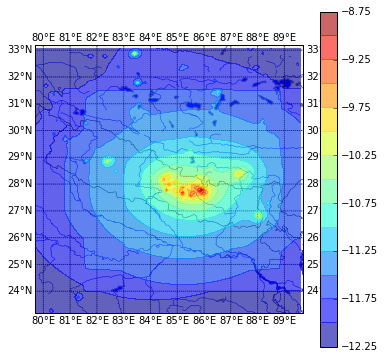

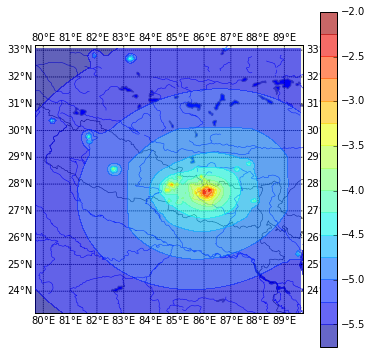

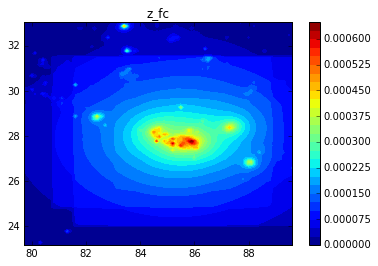

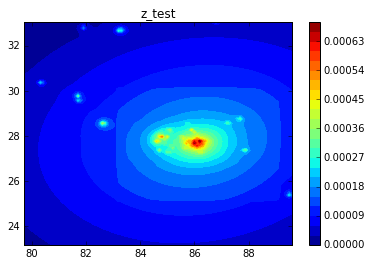

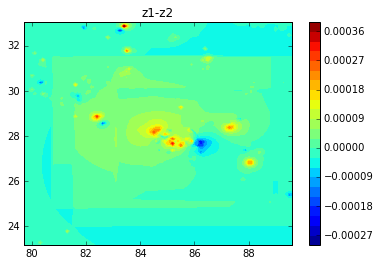

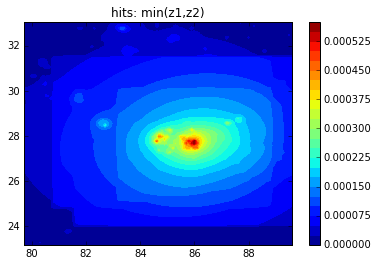

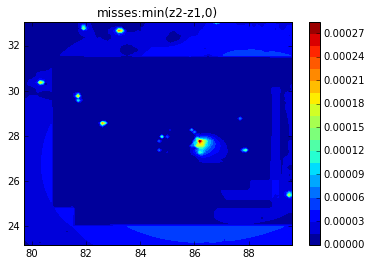

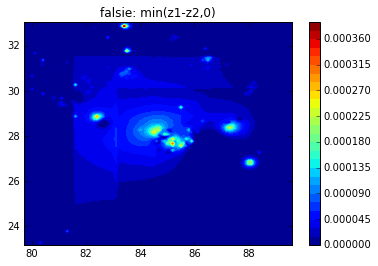

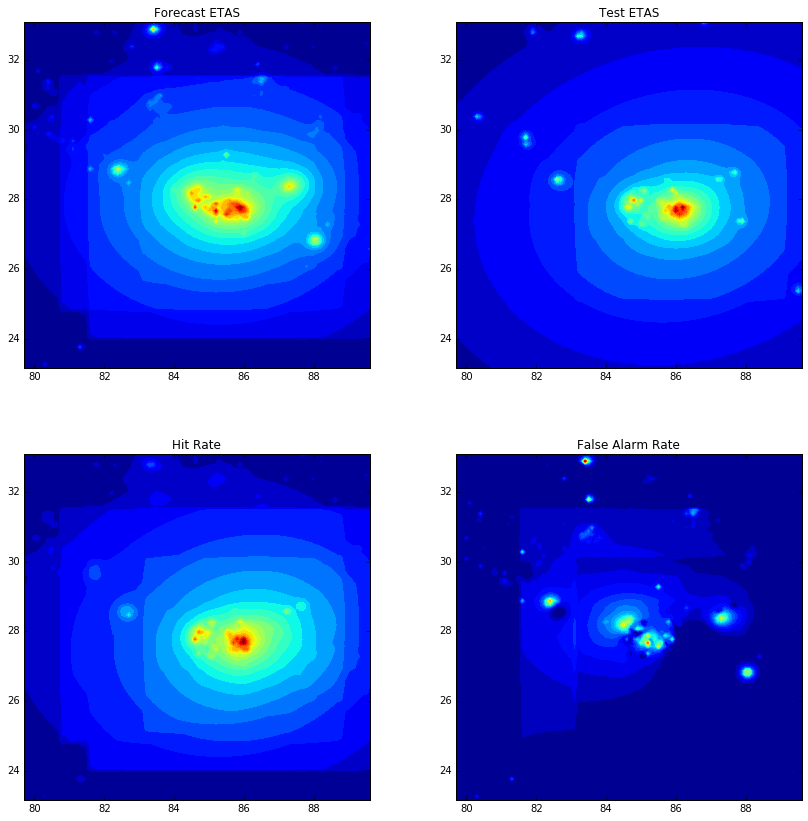

In [7]:
# splitting this script, just for development and maintenance purposes.
if True:
	fg_quad = plt.figure(42, figsize=(12,12))
	plt.clf()
	ax0 = fg_quad.add_axes([.05, .05, .4, .4])
	ax1 = fg_quad.add_axes([.05, .55, .4, .4], sharex=ax0, sharey=ax0)
	ax2 = fg_quad.add_axes([.55, .05, .4, .4], sharex=ax0, sharey=ax0)
	ax3 = fg_quad.add_axes([.55, .55, .4, .4], sharex=ax0, sharey=ax0)		
	#
	# what we really want to do here is to calc_etas() (or whatever we call it). we do a full on _contour_map() so we can look at it.
	# in the end, to do the gs_roc, we just need the ETAS xyz array.
	etas_fc.make_etas_contour_map(fignum=0)
	etas_test.make_etas()
	etas_test.make_etas_contour_map(fignum=1)
	#
	lon_vals = sorted(list(set(etas_fc.ETAS_array['x'])))
	lat_vals = sorted(list(set(etas_fc.ETAS_array['y'])))
	#
	# we need normalization here...
	# ... and we need to think a bit more about what we mean by normalize. here, we just shift the values
	#to be equal. do
	# we also want to normailze their range?
	z_fc_norm = etas_fc.ETAS_array['z'].copy()
	z_test_norm = etas_test.ETAS_array['z'].copy()
	#
	if do_log:
		z_fc_norm   = numpy.log10(z_fc_norm)
		z_test_norm = numpy.log10(z_test_norm)
	#
	#Normalize: first, subtract bias (shift to zero), then normalize total contribution --> 1.0
	z_fc_norm -= min(z_fc_norm)
	z_test_norm -= min(z_test_norm)
	#
	#norm_fc   = sum(z_fc_norm)
	#norm_test = sum(z_test_norm)
	#
	#z_fc_norm /= norm_fc
	#z_test_norm /= norm_test
	z_fc_norm /= sum(z_fc_norm)
	z_test_norm /= sum(z_test_norm)
	#
	z1 = z_fc_norm
	z2 = z_test_norm
	#
	#
	# [z1, z2, diff, h, m, f(predicted, didn't happen)
	#diffs = [[z1, z2, z1-z2, max(z1, z2), -min(z1-z2,0.), max(z1-z2,0.)] for z1,z2 in zip(z_fc_norm, z_test_norm)] 
	# hits: accurately predicted; min(z1,z2)
	# misses: prediction deficite, or excess events: min(z2-z1,0.)
	# falsie: excess prediction: min(z1-z2,0.)
	# then rates: H = hits/sum(z2), F =falsies/sum(z1)
	#diffs = [[z1, z2, z1-z2, min(z1, z2), max(z2-z1,0.), max(z1-z2, 0.)] for z1,z2 in zip(z_fc_norm, z_test_norm)]
	#
	# so we can test this properly, we'll want to move diffs offline to a function call (eventually)...
	
	#diffs = [[z1, z2, z1-z2, min(z1, z2), max(z2-z1,0.), max(z1-z2, 0.)] for z1,z2 in zip(z1, z2)]
	diffs = get_gs_diffs(z1,z2)
	diffs_lbls = ['z_fc', 'z_test', 'z1-z2', 'hits: min(z1,z2)','misses:min(z2-z1,0)', 'falsie: min(z1-z2,0)']
	diffs_lbl_basic = ['z_fc', 'z_test', 'z1-z2', 'hits','misses', 'falsie']
	#

	# to plot contours, we'll want to use the shape from: etas.lattice_sites.shape
	#
	sh1 = etas_fc.lattice_sites.shape
	sh2 = etas_test.lattice_sites.shape
	#
	print('shapes: ', sh1, sh2)
	#
	zs_diff, h, m, f = list(zip(*diffs))[2:]
	#
	# and ROC bits:
	# (i think really Molchan bits, aka, n_predicted/n_sites_covered); roc is a bit more subtle, but
	# they are approximately equal for large catalogs.
	# ... and this seems to be left over from something in the past; we don't use them.    
	#H = sum(h)/sum(z2)
	#F = sum(f)/sum(z1)
	#
	#for z in [zs_diff, h, m, f]:
	# plot the varous roc_gs contous (z1, z2, z2-z2, hits, etc.)
	for j,z in enumerate(list(zip(*diffs))):
		plt.figure(j+2)
		plt.clf()
		#
		zz=numpy.array(z)
		zz.shape=sh1
		#plt.contourf(list(set(etas_fc.ETAS_array['x'])), list(set(etas_fc.ETAS_array['y'])), zz, 25)
		#plt.contourf(numpy.log10(zz), 25)
		plt.contourf(lon_vals, lat_vals, zz, 25)
		plt.title(diffs_lbls[j])
		plt.colorbar()
		#
		# ... and make our quad-plot too:
		if j==0:
			ax1.contourf(lon_vals, lat_vals, zz, 25)
			ax1.set_title('Forecast ETAS')
			#ax1.colorbar()
		if j==1:
			ax3.contourf(lon_vals, lat_vals, zz, 25)
			ax3.set_title('Test ETAS')
			#ax3.colorbar()
		if j==3:
			ax0.contourf(lon_vals, lat_vals, zz, 25)
			ax0.set_title('Hit Rate')
			#ax0.colorbar()
		if j==5:
			ax2.contourf(lon_vals, lat_vals, zz, 25)
			ax2.set_title('False Alarm Rate')
			#ax2.colorbar()
	#
	#if diagnostic:
	#	print('***', diffs_lbls, type(diffs))
	#	#return [diffs_lbls] + diffs
	#	return diffs
	#else:
	#	return F,H
	##return F,H
	#

In [15]:
#print(fg_quad)
fg_quad.savefig(os.path.join(output_dir, 'roc_geospatial_quad.png'))
fg_quad.savefig(os.path.join(output_dir_dropbox, 'roc_geospatial_quad.png'))

print(z_fc_norm[0:10], z1[0:10], z2[0:10])

[  5.69164651e-06   6.12672100e-06   6.55980164e-06   6.99679563e-06
   7.45773307e-06   8.01452847e-06   8.68298385e-06   8.85017635e-06
   9.08340137e-06   9.41799554e-06] [  5.69164651e-06   6.12672100e-06   6.55980164e-06   6.99679563e-06
   7.45773307e-06   8.01452847e-06   8.68298385e-06   8.85017635e-06
   9.08340137e-06   9.41799554e-06] [  1.93627992e-05   2.04193301e-05   2.14714401e-05   2.25187816e-05
   2.35609950e-05   2.45977080e-05   2.56285358e-05   2.66530808e-05
   2.76709323e-05   2.86816666e-05]


begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2010-05-08 00:00:00+00:00
fetch and process catalog.
etas_prams:  {'b2': 1.5, 'b1': 1.0, 'q': 1.5, 'do_recarray': True, 'date_range': [datetime.datetime(1990, 1, 1, 0, 0, tzinfo=<UTC>), datetime.datetime(2015, 5, 7, 0, 0, tzinfo=<UTC>)], 'incat': None, 'd_tau': 2.28, 'lats': [23.175, 33.175], 'D_fract': 1.5, 'dmstar': 1.0, 'fit_factor': 1.5, 'mc': 3.5, 'lons': [79.698, 89.698], 'p': 1.1, 'd_lambda': 1.76}
data handle fetched...
 no file.
R:  <multiprocessing.pool.ApplyResult object at 0x7fcee02ff6a0>


/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:1700: RuntimeWarning: divide by zero encountered in true_divide
  cov = numpy.dot(numpy.array(list(zip(*cat_prime))),numpy.array(cat_prime))/n_dof


results fetched.
catalog fetched and processed.
ETAS over etas_cat_range/xyz_range:  ([0, 1240], None)
make_etas():
etas_mpp worker xyz_range:  [0, 10000]
begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2010-05-08 00:00:00+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 1240], [0, 10000])
begin make_etas_rtree()
now gather sub-arrays...
len(local_lattice_dict):  10000
Indices initiated. begin ETAS ::  [0, 1240]
finished calculateing ETAS (rtree). wrap up in recarray and return.
etas complete (from mpp_rtree run() loop); now pipe back([0, 1240])
ETAS complete.
begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2010-09-05 00:00:00+00:00
fetch and process catalog.
etas_prams:  {'b2': 1.5, 'b1': 1.0, 'q': 1.5, 'do_recarray': True, 'date_range': [datetime.datetime(2015, 5, 7, 0, 0, tzinfo=<UTC>), datetime.datetime(2015, 9, 4, 0, 0, tzinfo=<UTC>)], 

/home/myoder/Documents/Research/yoder/globalETAS/globalETAS.py:1700: RuntimeWarning: divide by zero encountered in true_divide
  cov = numpy.dot(numpy.array(list(zip(*cat_prime))),numpy.array(cat_prime))/n_dof


R:  <multiprocessing.pool.ApplyResult object at 0x7fceb116f978>
results fetched.
catalog fetched and processed.
ETAS over etas_cat_range/xyz_range:  ([0, 147], None)
etas_mpp worker xyz_range:  [0, 10000]
begin globalETAS.__init()__
Overriding t0 for ETAS calculations. using catalog start, t0 = t_now - catlen (1825.000000) = 2010-09-05 00:00:00+00:00
ETAS over etas_cat_range/xyz_range:  ([0, 147], [0, 10000])
begin make_etas_rtree()
now gather sub-arrays...
len(local_lattice_dict):  10000
Indices initiated. begin ETAS ::  [0, 147]
finished calculateing ETAS (rtree). wrap up in recarray and return.
etas complete (from mpp_rtree run() loop); now pipe back([0, 147])
shapes:  (100, 100) (100, 100)
*** ['z_fc', 'z_test', 'z1-z2', 'hits: min(z1,z2)', 'misses:min(z2-z1,0)', 'falsie: min(z1-z2,0)'] <class 'numpy.recarray'>


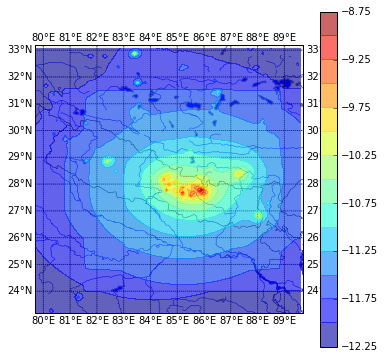

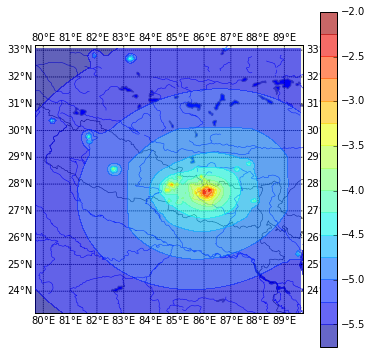

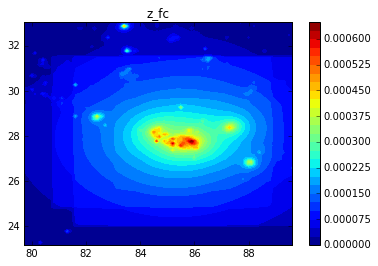

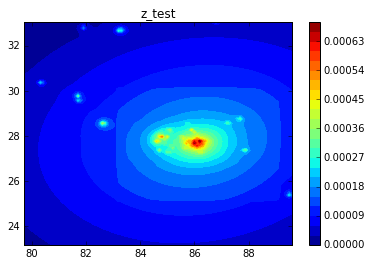

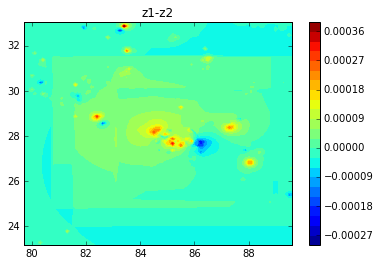

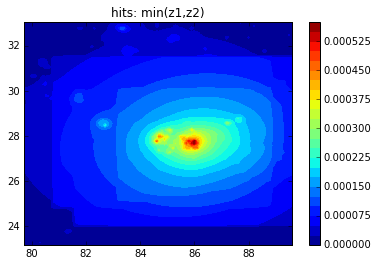

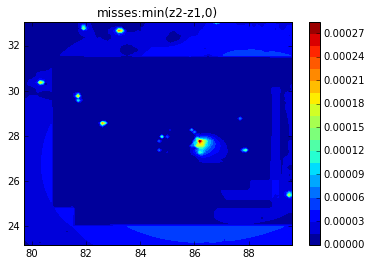

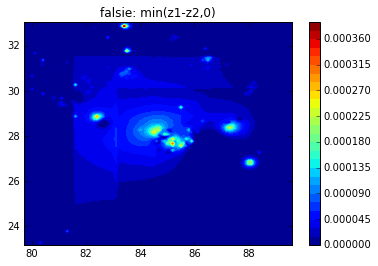

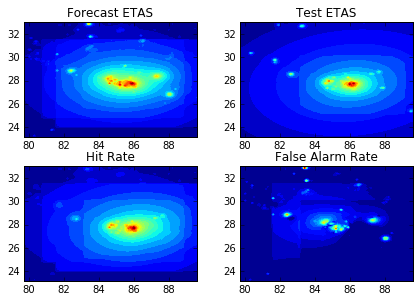

In [9]:
#bb=etas_analyzer.nepal_linear_roc()
diffs = etas_analyzer.analyze_etas_roc_geospatial(etas_fc=None, etas_test=None, do_log=True, diagnostic=True)

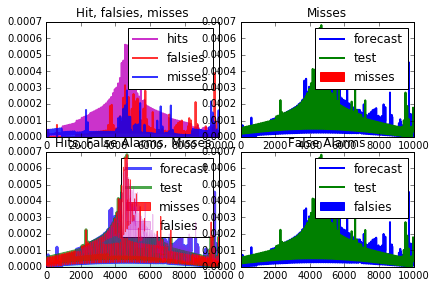

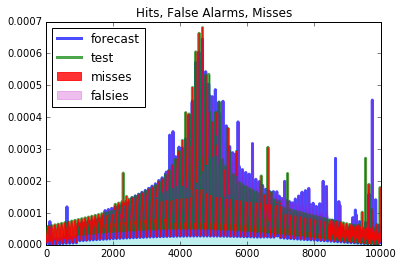

In [10]:
AA=etas_analyzer.roc_gs_linear_figs(diffs)

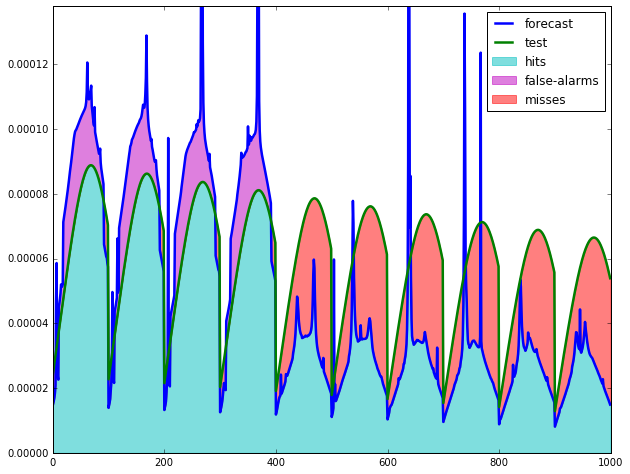

In [11]:
j0=8000
#j1=len(diffs)
j1=9000
#
mydiffs = diffs[j0:j1]
H = [min(z_fc, z_t) for z_fc, z_t in zip(mydiffs['z_fc'], mydiffs['z_test'])]
fg_mydiffs=plt.figure(figsize=(10,8))
plt.plot(mydiffs['z_fc'], label='forecast', color='b', lw=2.5)
plt.plot(mydiffs['z_test'], label='test', color='g', lw=2.5)
# hit rate:
plt.fill_between(range(len(mydiffs)), y1=numpy.zeros(len(mydiffs)), y2=mydiffs['hits'], color='c', alpha=.5,
                 label='hits')
#
# false alarm rate
plt.fill_between(range(len(mydiffs)), y1=mydiffs['z_test'], 
                 y2=[max(zfc, zt) for zfc,zt in zip(mydiffs['z_fc'], mydiffs['z_test'])], color='m',
                 alpha=.5, label='false-alarms')
#
# misses:
plt.fill_between(range(len(mydiffs)), y1=[min(zfc, zt) for zfc,zt in zip(mydiffs['z_fc'], mydiffs['z_test'])],
                 y2=mydiffs['z_test'], color='r', alpha=.5, label='misses')

#get the {somthing}% for a maximum y value:
y_max = sorted(mydiffs['z_fc'].tolist() + mydiffs['z_test'].tolist())[int(2*len(mydiffs)*.996)]
plt.gca().set_ylim(0.,y_max)
plt.legend(loc=0)


In [16]:
fg_mydiffs.savefig(os.path.join(output_dir, 'linear_geospatial_roc_sample_figure.png'))
fg_mydiffs.savefig(os.path.join(output_dir_dropbox, 'linear_geospatial_roc_sample_figure.png'))

#fg_quad.savefig(os.path.join(output_dir, 'geospatial_roc_nepal_quad.png'))
#fg_quad.savefig(os.path.join(output_dir_dropbox, 'geospatial_roc_nepal_quad.png'))



('z_fc', 'z_test', 'z1-z2', 'hits', 'misses', 'falsie')
mean h-f:  7.4410707421e-05  +/  6.15277216224e-05 6.10655306006e-05 5.76113166434e-05
prob <0:  0.0042
prob >=0:  0.9958


(-0.00034148698067684811, 0.00059008860437263495)

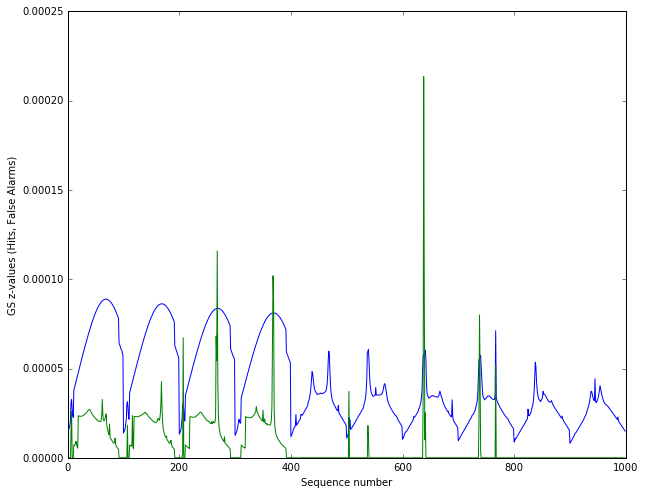

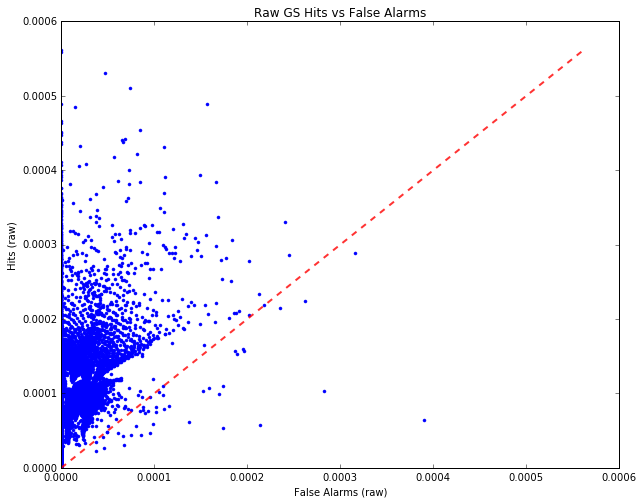

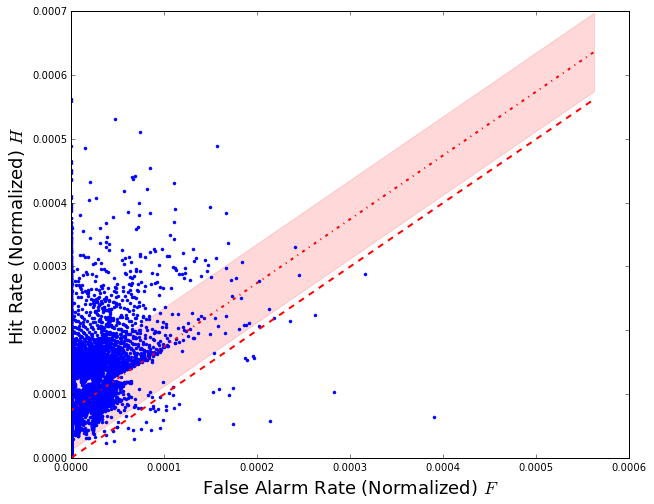

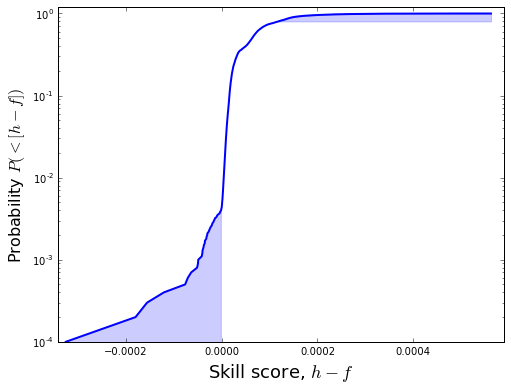

In [26]:
print(mydiffs.dtype.names)
plt.figure(figsize=(10,8))
plt.plot(mydiffs['hits'])
plt.plot(mydiffs['falsie'])
ax=plt.gca()
ax.set_xlabel('Sequence number')
ax.set_ylabel('GS z-values (Hits, False Alarms)')

plt.figure(figsize=(10,8))
plt.clf()
plt.plot(diffs['falsie'], diffs['hits'], marker='.', ls='')
plt.plot(numpy.linspace(0., max(max(diffs['falsie']), max(diffs['hits'])), 100),
         numpy.linspace(0., max(max(diffs['falsie']), max(diffs['hits'])), 100),
         color='r', lw=2., ls='--', alpha=.8)
plt.ylabel('Hits (raw)')
plt.xlabel('False Alarms (raw)')
plt.title('Raw GS Hits vs False Alarms')

fg_roc = plt.figure(figsize=(10,8))
ax=fg_roc.gca()
#H = diffs['hits']/max(diffs['hits'])
#F = diffs['falsie']/max(diffs['falsie'])
H = diffs['hits']
F = diffs['falsie']

ax.plot(F,H, marker='.', ls='')
#
# H=F diagonal (but allow for non-normalized and use a bunch of points in case we log-scale.)
ax.plot(numpy.linspace(0,max(list(F) + list(H)), 250), 
         numpy.linspace(0,max(list(F) + list(H)), 250), lw=2., color='r', ls='--')
h_f = [h-f for h,f in zip(H,F)]
h_f_sorted = sorted(h_f)

h_f_m = numpy.mean(h_f)
std_h = numpy.std(h_f)
std_h_gt = numpy.std([x for x in h_f if x>0])
std_h_lt = numpy.std([x for x in h_f if x<=0])

#ax=plt.gca()
ax.set_xlabel('False Alarm Rate (Normalized) $F$', size=18)
ax.set_ylabel('Hit Rate (Normalized) $H$', size=18)

ax.plot(numpy.linspace(0,max(list(F) + list(H)), 250), 
         numpy.linspace(0,max(list(F) + list(H)), 250)+h_f_m, lw=2., color='r', ls='-.')

ax.fill_between(numpy.linspace(0,max(list(F) + list(H)), 250), 
         numpy.linspace(0,max(list(F) + list(H)), 250)+h_f_m-std_h, 
         numpy.linspace(0,max(list(F) + list(H)), 250)+h_f_m+std_h, color='r', alpha=.15)

print('mean h-f: ', h_f_m, ' +/ ', std_h, std_h_gt, std_h_lt)
print('prob <0: ', len([x for x in h_f if x<0])/len(h_f))
print('prob >=0: ', len([x for x in h_f if x>=0])/len(h_f))

fg_hf_dist = plt.figure(figsize=(8,6))
ax=plt.gca()
ax.set_yscale('log')
ax.plot(h_f_sorted, numpy.arange(1,len(h_f)+1)/len(h_f), '-', lw=2.)
ax.fill_between(h_f_sorted, numpy.zeros(len(h_f)), numpy.arange(1,len(h_f)+1)/len(h_f), color='b', 
                alpha=.2, interpolate=True, where=[x<0 for x in h_f_sorted] )
upper=.8
ax.fill_between(h_f_sorted, upper*numpy.ones(len(h_f)), numpy.arange(1,len(h_f)+1)/len(h_f), color='b', 
                alpha=.2, interpolate=True, where=[x>upper for x in numpy.arange(1,len(h_f)+1)/len(h_f)] )
ax.set_xlabel('Skill score, $h-f$', size=18)
ax.set_ylabel('Probability $P(<[h-f])$', size=16)
ax.set_ylim(0., 1.2)
ax.set_xlim(1.05*min(h_f), 1.05*max(h_f))
#

In [18]:
# /home/myoder/Documents/Research/yoder/globalETAS/data/revisions_outputs
output_dir = '/home/myoder/Documents/Research/yoder/globalETAS/data/revisions_outputs'
fg_roc.savefig(os.path.join(output_dir, 'roc_geospatial_elements_nepal.png'))
fg_hf_dist.savefig(os.path.join(output_dir, 'roc_geospatial_elements_nepal_h_CDF.png'))
#
#fg_roc.savefig('/home/myoder/Dropbox/Research/globalETAS/nepal_etas/data_n_figs/roc_geospatial_elements_nepal.png')
#fg_hf_dist.savefig('/home/myoder/Dropbox/Research/globalETAS/nepal_etas/data_n_figs/roc_geospatial_elements_nepal_h_CDF.png')